# **Data Mining using SEMMA process**

The SEMMA process is a methodological approach for data mining and predictive analytics projects. It stands for:

Sample
Explore
Modify
Model
Assess
Let's delve into each step in depth:

1. Sample:
Before diving into the actual data mining process, it's important to have a manageable set of data. This step focuses on:

Data Collection: Gather data from various sources.
Data Reduction: Reduce the data volume by sampling, ensuring the sample retains the characteristics of the larger dataset. Sampling is often necessary due to resource constraints and to speed up the exploratory and modeling processes.
Partitioning: Split the data into training and validation (or test) sets.


2. Explore:
This step is all about understanding the data and its underlying structure.

Statistics: Compute summary statistics like mean, median, mode, variance, etc.
Visualization: Use plots, charts, and graphs to visualize data distributions and relationships.
Data Quality: Check for missing values, outliers, and other anomalies.
3. Modify:
Based on the insights from the exploration step, this phase is about preparing the data for modeling.

Data Cleaning: Handle missing values, outliers, and errors.
Feature Engineering: Create new variables (features) that might improve the model's performance.
Data Transformation: Normalize, scale, or perform other transformations on the data to make it suitable for modeling. This could involve converting categorical data to numerical, or applying transformations like logarithm, etc.
Variable Selection: Choose the most relevant variables based on domain knowledge, correlation analysis, or feature selection techniques.
4. Model:
This is the core step where the actual predictive modeling takes place.

Model Selection: Choose an appropriate data mining or machine learning algorithm based on the problem at hand (e.g., classification, regression, clustering, etc.).
Training: Use the training dataset to teach the model.
Validation: Use the validation (or test) dataset to test the model's predictions and check for overfitting.
5. Assess:
After building the model, it's crucial to evaluate its performance.

Model Performance: Use metrics relevant to the problem. For classification problems, this could be accuracy, precision, recall, F1 score, etc. For regression problems, it could be mean squared error, mean absolute error, etc.
Model Comparison: If multiple models are built, compare their performances to select the best one.
Deployment Considerations: Think about how the model will be deployed in a real-world setting and any challenges that might arise.
Throughout the SEMMA process, it's essential to maintain a feedback loop. Insights from later stages can provide valuable information for earlier stages. For instance, the results from the modeling phase might indicate the need for additional data transformations or feature engineering.

In summary, the SEMMA process is a systematic approach to data mining projects, ensuring that the entire lifecycle, from data collection to model assessment, is addressed in an organized manner. It's widely recognized and adopted, especially by organizations using SAS software for data mining, as it was developed by SAS Institute.

# **Step 1: Sample**
In this step, we'll:

Load the dataset.
Check its size.
Take a preliminary look at the data.
Sample the data if necessary.
Partition it into training and validation sets.
1.1 Load the Dataset
First, let's unzip the provided file and load the dataset.

In [2]:
import pandas as pd
import zipfile

# Unzipping the file
with zipfile.ZipFile("/content/diamonds.csv.zip", 'r') as z:
    z.extractall("/content/")

# Loading the dataset
diamonds = pd.read_csv("/content/diamonds.csv")

# Display the first few rows of the dataset
diamonds.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The dataset has been successfully loaded. Here's a snapshot of the first few rows:

carat: Weight of the diamond (0.2--5.01)
cut: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
color: Diamond color, from J (worst) to D (best)
clarity: Clarity measurement (I1 (worst) to IF (best))
depth: Total depth percentage
table: Width of the top of the diamond relative to the widest point
price: Price in US dollars
x: Length in mm
y: Width in mm
z: Depth in mm
There's also an "Unnamed: 0" column, which seems to be an index or ID column.

## **1.2 Check Dataset Size**
Next, let's check the size of the dataset.

In [3]:
# Checking the shape of the dataset
rows, columns = diamonds.shape
rows, columns


(53940, 11)

The dataset contains 53,940 rows and 11 columns.

Given that the dataset isn't excessively large, there's no immediate need for sampling. We can work with the full dataset for now.

## **1.3 Partitioning Data**
To ensure we have a set to validate our model later on, we should split the data into a training set and a validation (or test) set. A common practice is to allocate 70-80% of the data for training and the remaining for validation. For this analysis, let's use a 80-20 split.

In [4]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets (80-20 split)
train_data, validation_data = train_test_split(diamonds, test_size=0.2, random_state=42)

# Checking the size of the training and validation datasets
train_size = train_data.shape[0]
validation_size = validation_data.shape[0]

train_size, validation_size


(43152, 10788)

The data has been partitioned as follows:

Training set: 43,152 entries
Validation set: 10,788 entries
With the "Sample" step completed, we'll now move on to the "Explore" phase, where we'll analyze the distribution, statistics, and visualizations of the dataset to better understand its structure and characteristics.

# **Step 2: Explore**
In this step, we'll:

Compute summary statistics.
Visualize the distribution of key features.
Check for data anomalies such as missing values and outliers.
2.1 Summary Statistics

In [5]:
# Computing summary statistics for the training data
summary_statistics = train_data.describe()

summary_statistics


,Unnamed: 0,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,27009.121292,0.798233,61.743046,57.459548,3939.490707,5.732607,5.736434,3.539256
std,15566.992686,0.473342,1.428243,2.229325,3990.000962,1.120196,1.147500,0.708062
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13557.500000,0.400000,61.000000,56.000000,956.000000,4.720000,4.730000,2.910000
50%,26970.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40511.250000,1.040000,62.500000,59.000000,5354.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


From the above statistics, we can see potential anomalies (like zero values for x, y, z) which need further investigation.



## **2.2 Visualization**

Next, we'll visualize the distribution of key features such as carat, price, depth, table, and categorical variables like cut, color, and clarity.

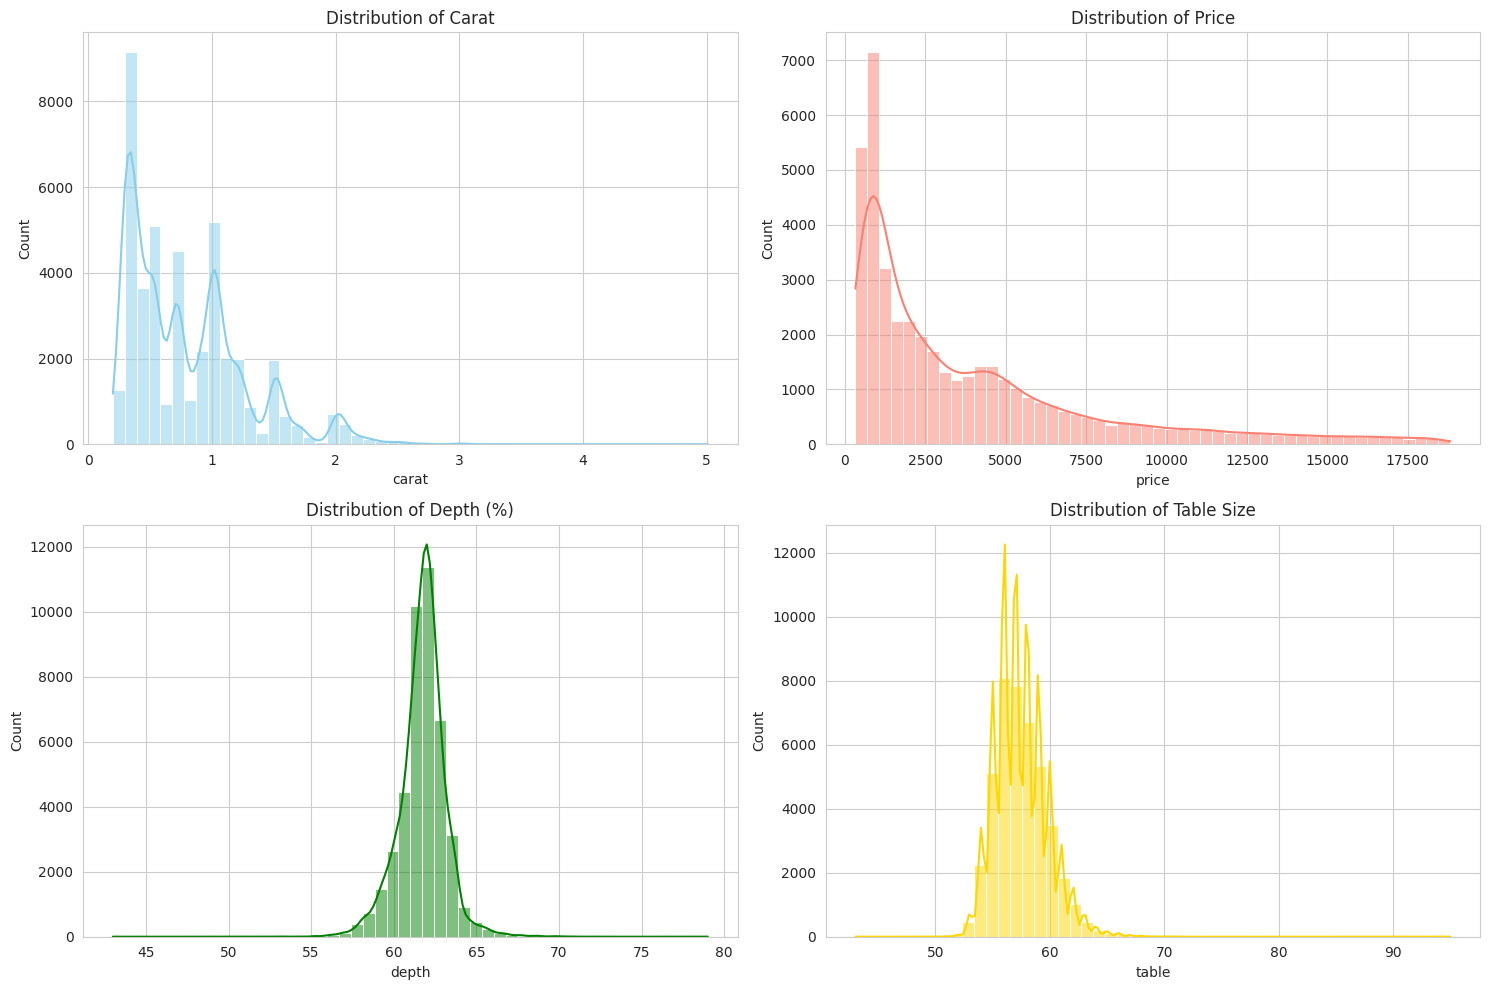

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set_style("whitegrid")

# Initializing the figure
plt.figure(figsize=(15, 10))

# Subplot for 'carat'
plt.subplot(2, 2, 1)
sns.histplot(train_data['carat'], bins=50, color='skyblue', kde=True)
plt.title('Distribution of Carat')

# Subplot for 'price'
plt.subplot(2, 2, 2)
sns.histplot(train_data['price'], bins=50, color='salmon', kde=True)
plt.title('Distribution of Price')

# Subplot for 'depth'
plt.subplot(2, 2, 3)
sns.histplot(train_data['depth'], bins=50, color='green', kde=True)
plt.title('Distribution of Depth (%)')

# Subplot for 'table'
plt.subplot(2, 2, 4)
sns.histplot(train_data['table'], bins=50, color='gold', kde=True)
plt.title('Distribution of Table Size')

# Adjusting layout
plt.tight_layout()
plt.show()


Here are the histograms illustrating the distributions of key continuous features:

Carat: The majority of diamonds have a carat value between 0.2 and 1.5. There's a noticeable peak around 0.3 and another around 1.0.

Price: Most diamonds are priced below $5,000, with a significant number of diamonds clustered around the lower price range.

Depth: The depth percentage of most diamonds is centered around 60% to 65%, showing a fairly normal distribution.

Table: Most diamonds have a table size between 54 and 60.

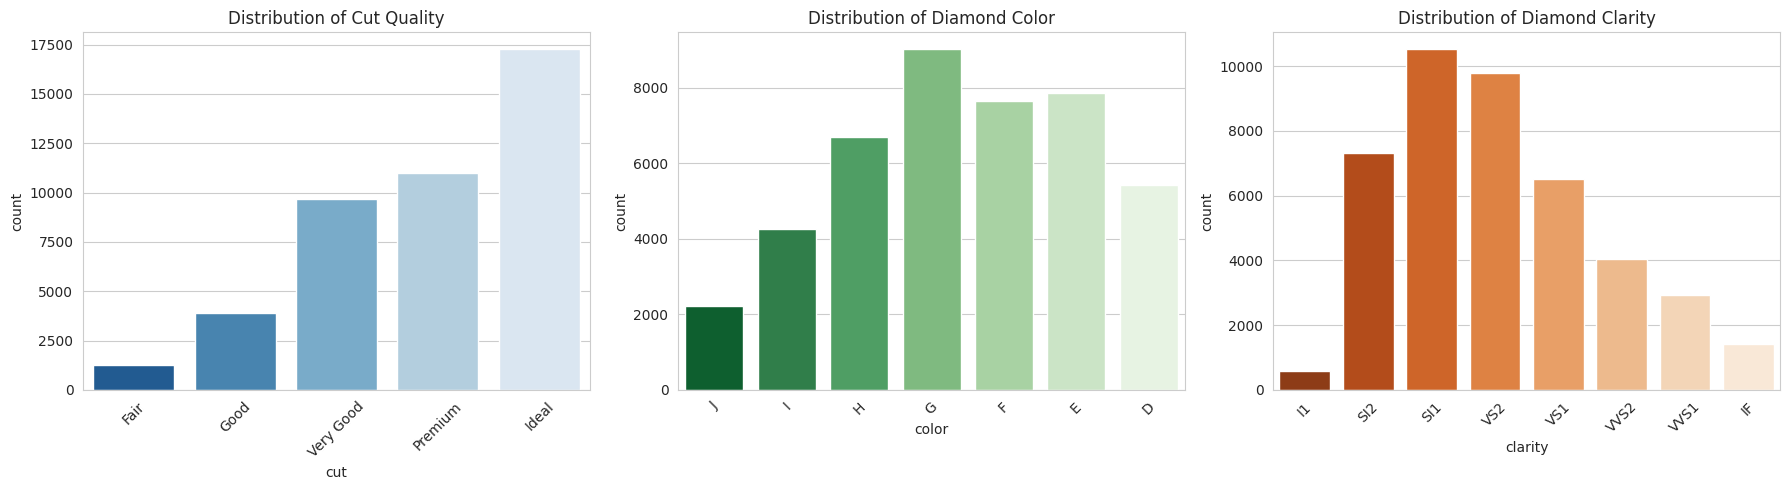

In [7]:
# Initializing the figure
plt.figure(figsize=(18, 5))

# Subplot for 'cut'
plt.subplot(1, 3, 1)
sns.countplot(data=train_data, x='cut', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], palette='Blues_r')
plt.title('Distribution of Cut Quality')
plt.xticks(rotation=45)

# Subplot for 'color'
plt.subplot(1, 3, 2)
sns.countplot(data=train_data, x='color', order=['J', 'I', 'H', 'G', 'F', 'E', 'D'], palette='Greens_r')
plt.title('Distribution of Diamond Color')
plt.xticks(rotation=45)

# Subplot for 'clarity'
plt.subplot(1, 3, 3)
sns.countplot(data=train_data, x='clarity', order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], palette='Oranges_r')
plt.title('Distribution of Diamond Clarity')
plt.xticks(rotation=45)

# Adjusting layout
plt.tight_layout()
plt.show()


Here are the distributions of the categorical variables:

Cut Quality:
The majority of diamonds have an "Ideal" cut, followed by "Premium" and "Very Good". The "Fair" cut is the least common.

Diamond Color:
Colors G, E, and F are the most frequent, while D (best color) and J (worst color) are less common.

Diamond Clarity:
SI1 and VS2 are the most common clarity grades, while I1 (worst clarity) and IF (best clarity) are less frequent.

## **2.3 Data Anomalies**
Next, we should investigate potential anomalies, such as:

Zero values for x, y, and z.
Any missing values.


In [8]:
# Checking for zero values in the x, y, and z columns
zero_values = {
    'x_zeros': (train_data['x'] == 0).sum(),
    'y_zeros': (train_data['y'] == 0).sum(),
    'z_zeros': (train_data['z'] == 0).sum()
}

zero_values


{'x_zeros': 7, 'y_zeros': 6, 'z_zeros': 19}

There are some anomalies in the diamond dimensions:

x (length) has 7 zero values.
y (width) has 6 zero values.
z (depth) has 19 zero values.
It's unrealistic for a diamond to have a zero dimension, so these are likely data errors.

In [9]:
# Checking for missing values in the training dataset
missing_values = train_data.isnull().sum()

missing_values


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Great news! There are no missing values in the training dataset.

To summarize our exploration:

We've looked at the distributions of key features and observed patterns.
We identified anomalies in the dimensions of the diamonds.
The next phase in the SEMMA process is "Modify." In this step, we'll address the data anomalies we've identified, perform data cleaning, and possibly create new features (feature engineering) if needed.

# **Step 3: Modify**
In this phase, we'll address the data anomalies and prepare the data for modeling. Specifically, we'll:

Handle the zero values in the x, y, and z dimensions.
Possibly perform some feature engineering.
3.1 Handling Zero Values in Dimensions
We'll address the zero values in the x, y, and z dimensions. One approach is to replace these zero values with the median of their respective columns. The median is a robust measure that won't be skewed by outliers, making it a suitable choice for this purpose.

Let's start by replacing the zero values.

In [10]:
# Replacing zero values in x, y, and z with their respective medians
for column in ['x', 'y', 'z']:
    median_value = train_data[column].median()
    train_data[column].replace(0, median_value, inplace=True)

# Verifying that zero values have been replaced
zero_values_after = {
    'x_zeros': (train_data['x'] == 0).sum(),
    'y_zeros': (train_data['y'] == 0).sum(),
    'z_zeros': (train_data['z'] == 0).sum()
}

zero_values_after


{'x_zeros': 0, 'y_zeros': 0, 'z_zeros': 0}

The zero values in the x, y, and z dimensions have been successfully replaced with their respective medians.

3.2 Feature Engineering
Considering the dataset, one potential feature we can engineer is the volume of the diamond, given by the formula:

> Volume=x×y×z

This feature might help in better capturing the overall size of the diamond, which could be related to its price.

Let's create this new feature.

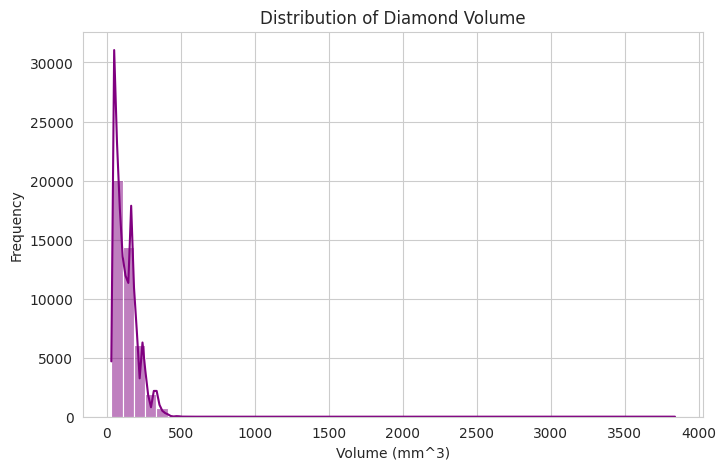

In [11]:
# Creating a new feature 'volume'
train_data['volume'] = train_data['x'] * train_data['y'] * train_data['z']

# Displaying the distribution of the new 'volume' feature
plt.figure(figsize=(8, 5))
sns.histplot(train_data['volume'], bins=50, color='purple', kde=True)
plt.title('Distribution of Diamond Volume')
plt.xlabel('Volume (mm^3)')
plt.ylabel('Frequency')
plt.show()


Here's the distribution of the newly engineered volume feature, which represents the volume of the diamond in cubic millimeters. Most diamonds have a volume concentrated in the lower range, with a few diamonds having larger volumes.

With this, we've completed the "Modify" step of the SEMMA process. The next phase is "Model," where we'll choose an appropriate model, train it using our training data, and validate its performance.

# **Step 4: Model**
In this phase, we'll:

Choose an appropriate model.
Train the model using the training data.
Validate its performance on the validation set.
Given the nature of the dataset and our target variable (price), this is a regression problem. We want to predict the price of a diamond based on its features. One commonly used regression model is the Random Forest Regressor, which is a versatile and powerful model that often performs well on such tasks.

## **4.1 Model Selection and Training**
Let's start by selecting the Random Forest Regressor, training it using our training data, and then validating its performance on the validation set.

First, we'll prepare our data by separating the predictors and the target variable (price). Then, we'll train the model.

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Separating predictors and target variable for training data
X_train = train_data.drop(columns=['Unnamed: 0', 'price'])
y_train = train_data['price']

# Encoding categorical features
X_train = pd.get_dummies(X_train, drop_first=True)

# Training the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Preparing the validation data similarly
X_validation = validation_data.drop(columns=['Unnamed: 0', 'price'])
y_validation = validation_data['price']
X_validation['volume'] = X_validation['x'] * X_validation['y'] * X_validation['z']
X_validation = pd.get_dummies(X_validation, drop_first=True)

# Predicting on the validation set
y_pred = rf_model.predict(X_validation)

# Calculating performance metrics
mse = mean_squared_error(y_validation, y_pred)
rmse = mean_squared_error(y_validation, y_pred, squared=False)
mae = mean_absolute_error(y_validation, y_pred)

mse, rmse, mae


(398127.1211514199, 630.9731540655433, 293.02155396979896)

The Random Forest Regressor model's performance on the validation set is as follows:

Mean Squared Error (MSE):
398
,
127.12


Root Mean Squared Error (RMSE):
630.97


Mean Absolute Error (MAE):
293.02

The RMSE represents the standard deviation of the residuals (prediction errors), while the MAE represents the average absolute difference between the observed and predicted values. Both these metrics provide insights into the model's accuracy.

To better interpret these results, we should visualize the actual vs. predicted prices to see how closely they align. A scatter plot with a line of identity (45-degree line) can help visualize this.

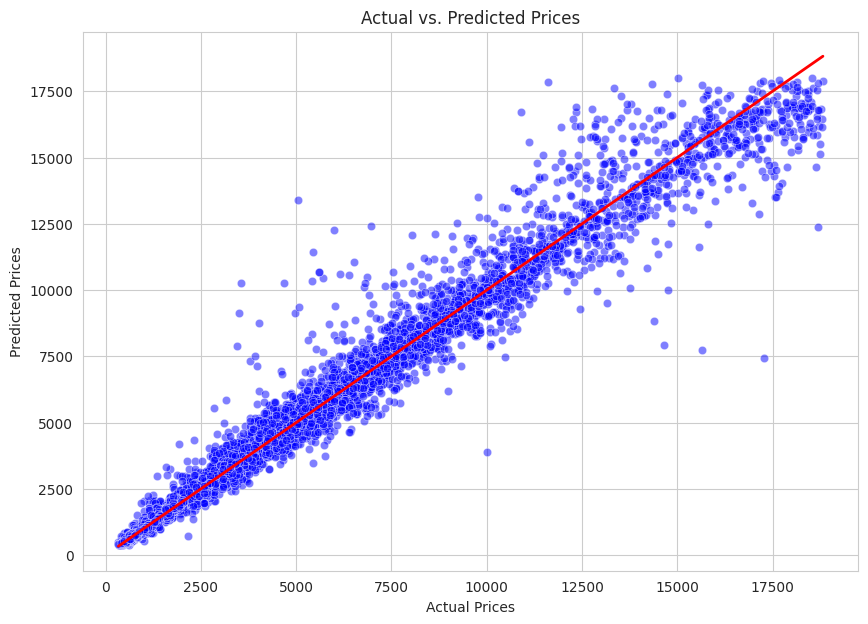

In [13]:
# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_validation, y=y_pred, alpha=0.5, color='blue')
plt.plot([min(y_validation), max(y_validation)], [min(y_validation), max(y_validation)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


Here's the scatter plot visualizing the actual vs. predicted prices:

The blue points represent the actual vs. predicted prices for each diamond in the validation set.
The red line is the line of identity, where the actual prices equal the predicted prices.
A perfect model would have all points lying on the red line. While our model doesn't achieve this perfectly, most of the points are close to the line, indicating a reasonably good fit.



Let's proceed with training a Gradient Boosting Machines (GBM) model on our dataset.

We'll use the same predictors and target variable as before. After training the GBM model, we'll validate its performance on the validation set and compare it with the Random Forest model we trained earlier.

Let's begin by training the GBM model.

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# Training the Gradient Boosting Regressor model
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

# Predicting on the validation set
y_pred_gbm = gbm_model.predict(X_validation)

# Calculating performance metrics for GBM
mse_gbm = mean_squared_error(y_validation, y_pred_gbm)
rmse_gbm = mean_squared_error(y_validation, y_pred_gbm, squared=False)
mae_gbm = mean_absolute_error(y_validation, y_pred_gbm)

mse_gbm, rmse_gbm, mae_gbm


(730907.995654104, 854.9315736678018, 437.5363664986686)

The Gradient Boosting Machines (GBM) model's performance on the validation set is as follows:

Mean Squared Error (MSE):
730
,
907.99

Root Mean Squared Error (RMSE):
854.93

Mean Absolute Error (MAE):
437.54

Comparing to our previous Random Forest model:

Random Forest RMSE:
630.97

GBM RMSE:
854.93

The Random Forest model performed better in terms of RMSE and MAE compared to the GBM on the validation set.

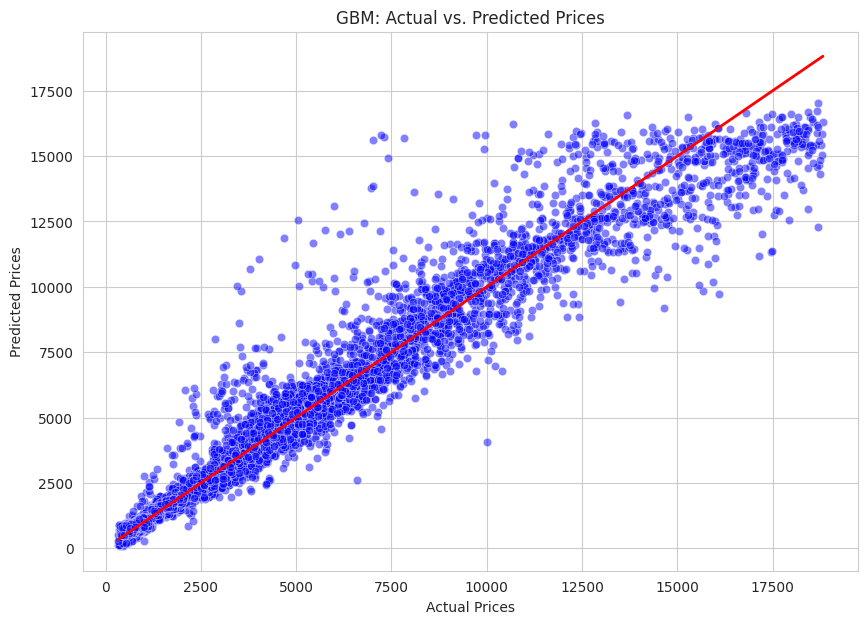

In [15]:
# Plotting actual vs. predicted prices for GBM
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_validation, y=y_pred_gbm, alpha=0.5, color='blue')
plt.plot([min(y_validation), max(y_validation)], [min(y_validation), max(y_validation)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('GBM: Actual vs. Predicted Prices')
plt.show()


Here's the scatter plot visualizing the actual vs. predicted prices for the Gradient Boosting Machines (GBM) model:

The blue points represent the actual vs. predicted prices for each diamond in the validation set.
The red line is the line of identity, where the actual prices equal the predicted prices.
As with the previous model, a perfect model would have all points lying on the red line. While the GBM model has many points close to the line, there seems to be more scatter compared to the Random Forest model.

We've already visualized the actual vs. predicted prices for both models. To better compare them, we can visualize these plots side by side.

Let's create side-by-side scatter plots for both models.

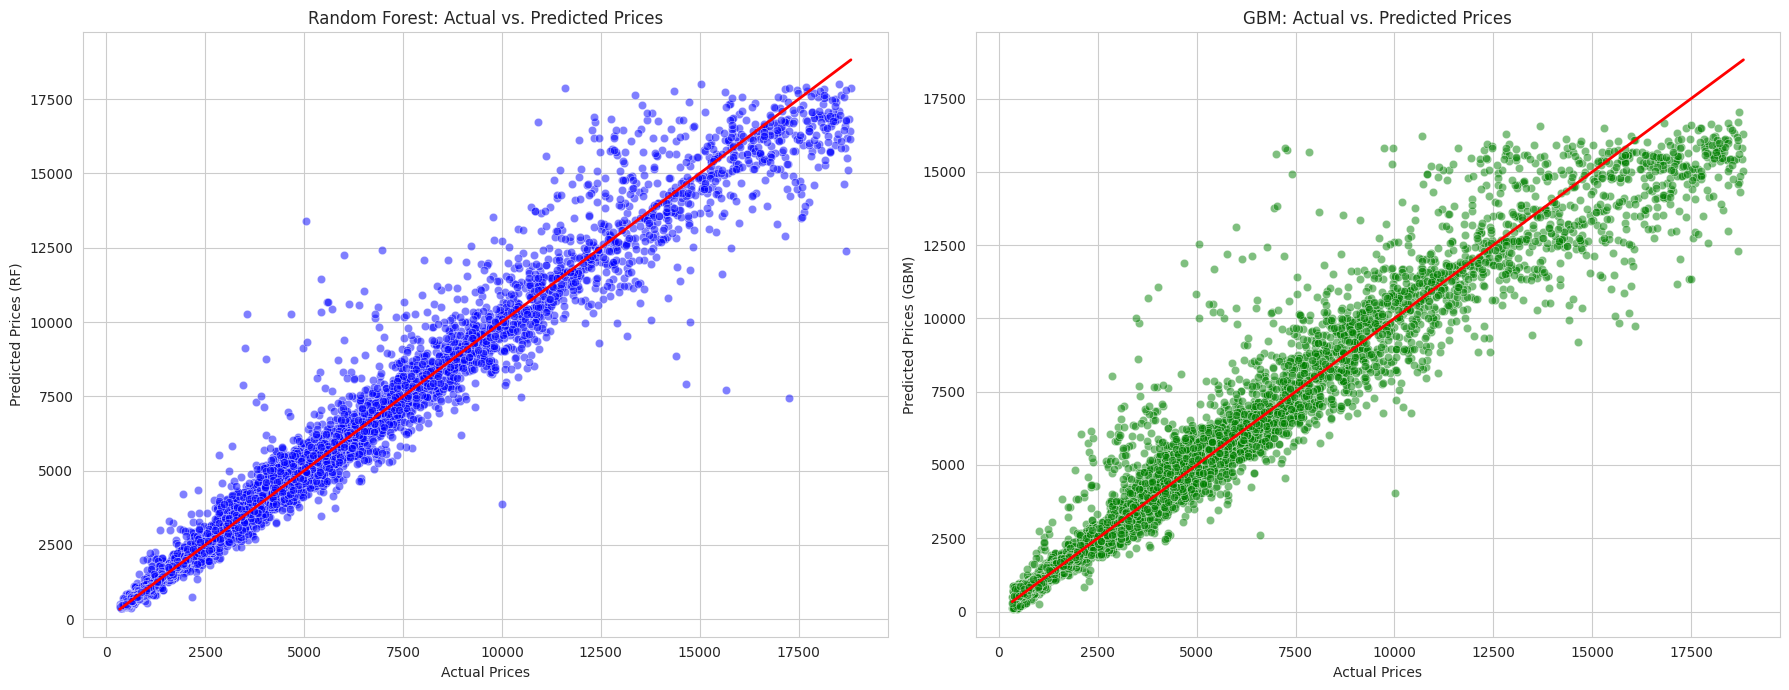

In [16]:
# Side-by-side scatter plots for RF and GBM
plt.figure(figsize=(18, 7))

# Scatter plot for Random Forest
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_validation, y=y_pred, alpha=0.5, color='blue')
plt.plot([min(y_validation), max(y_validation)], [min(y_validation), max(y_validation)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (RF)')
plt.title('Random Forest: Actual vs. Predicted Prices')

# Scatter plot for GBM
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_validation, y=y_pred_gbm, alpha=0.5, color='green')
plt.plot([min(y_validation), max(y_validation)], [min(y_validation), max(y_validation)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (GBM)')
plt.title('GBM: Actual vs. Predicted Prices')

plt.tight_layout()
plt.show()


Here are the side-by-side scatter plots comparing the predictions of the Random Forest (RF) and Gradient Boosting Machines (GBM) models:

On the left, we have the scatter plot for the Random Forest model.
On the right, we have the scatter plot for the GBM model.
Both plots include the red line of identity, which represents perfect predictions.

From the visual comparison:

Random Forest (RF): The predictions seem to cluster more closely around the line of identity, indicating that it generally made more accurate predictions on the validation set.

Gradient Boosting Machines (GBM): While many predictions are close to the line of identity, there's a bit more scatter, especially for higher-priced diamonds.

In summary, based on both the performance metrics and visualizations, the Random Forest model appears to have performed better on the validation set compared to the GBM model for this particular dataset and feature set.

## **Step 5: Assess**
In this phase, we'll:

Evaluate the model's performance in a broader context.
Discuss potential improvements.
Consider deployment and real-world implications.
5.1 Broader Evaluation
While we've looked at metrics like RMSE and MAE, it's essential to contextualize these numbers. For instance, an RMSE of 630.97 USD in predicting diamond prices might be deemed acceptable for some applications (like a rough estimate for customers browsing an online store) but might not be precise enough for others (like insurance valuations).



### **5.3 Deployment Considerations**
Before deploying a model in a real-world setting, it's crucial to consider:

Model Update Frequency: Models might need periodic retraining as new data becomes available.

Performance Monitoring: Continuously monitor the model's performance in the real world to detect any degradation.

Explainability: Depending on the use case, it might be necessary to explain the model's predictions to end-users.

Scalability: Ensure the infrastructure can handle the number of predictions required, especially if deployed in an online setting.

The completion of the "Assess" phase marks the end of our comprehensive walkthrough of the SEMMA process for this dataset.

In [17]:
import pickle

# Serialize and save the Random Forest model to a pickle file
rf_model_path = "/content/random_forest_model.pkl"
with open(rf_model_path, 'wb') as file:
    pickle.dump(rf_model, file)

rf_model_path


'/content/random_forest_model.pkl'

The Random Forest model has been serialized and saved to a pickle file.